In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns

from scipy import stats
from sklearn import naive_bayes, metrics
from sklearn.model_selection import train_test_split

In [3]:
iris = pd.read_excel(io='IrisSNN.xls', sheet_name='IrisSNN')
iris

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,NNSET,SLENGTH,SWIDTH,PLENGTH,PWIDTH,FLOWER
0,Select,5.1,3.5,1.4,0.2,Setosa
1,Select,4.9,3.0,1.4,0.2,Setosa
2,Train,4.7,3.2,1.3,0.2,Setosa
3,Select,4.6,3.1,1.5,0.2,Setosa
4,Train,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
145,Select,6.7,3.0,5.2,2.3,Virginic
146,Train,6.3,2.5,5.0,1.9,Virginic
147,Select,6.5,3.0,5.2,2.0,Virginic
148,Select,6.2,3.4,5.4,2.3,Virginic


In [4]:
iris = pd.read_excel(io='IrisSNN.xls', sheet_name='IrisSNN')
iris.rename(columns={'NNSET' : 'Neural Network Set',
                     'SLENGTH' : 'Sepal Length', 
                     'SWIDTH' : 'Sepal Width', 
                     'PLENGTH' : 'Petal Length', 
                     'PWIDTH' : 'Petal Width', 
                     'FLOWER' : 'Flower Species'}, inplace=True)
iris

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Neural Network Set,Sepal Length,Sepal Width,Petal Length,Petal Width,Flower Species
0,Select,5.1,3.5,1.4,0.2,Setosa
1,Select,4.9,3.0,1.4,0.2,Setosa
2,Train,4.7,3.2,1.3,0.2,Setosa
3,Select,4.6,3.1,1.5,0.2,Setosa
4,Train,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...,...
145,Select,6.7,3.0,5.2,2.3,Virginic
146,Train,6.3,2.5,5.0,1.9,Virginic
147,Select,6.5,3.0,5.2,2.0,Virginic
148,Select,6.2,3.4,5.4,2.3,Virginic


In [5]:
list(iris.columns)

['Neural Network Set',
 'Sepal Length',
 'Sepal Width',
 'Petal Length',
 'Petal Width',
 'Flower Species']

In [6]:
set_column = iris.columns[0]    # train/test set
X_columns = iris.columns[1:-1]  # features
y_column = iris.columns[-1]     # category

X = iris[X_columns]
y = iris[y_column]

categories = y.unique()

print(set_column)
print(list(X_columns))
print(y_column, ':', categories)

num_features = len(X_columns)
num_categories = len(iris[y_column].unique())
print(f'Number of features = {num_features}')
print(f'Number of categories = {num_categories}')

Neural Network Set
['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
Flower Species : ['Setosa' 'Versicol' 'Virginic']
Number of features = 4
Number of categories = 3


In [7]:
iris[y_column].value_counts()

Flower Species
Setosa      50
Versicol    50
Virginic    50
Name: count, dtype: int64

In [8]:
def estimate(sample : np.ndarray):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    return sample_mean, sample_std

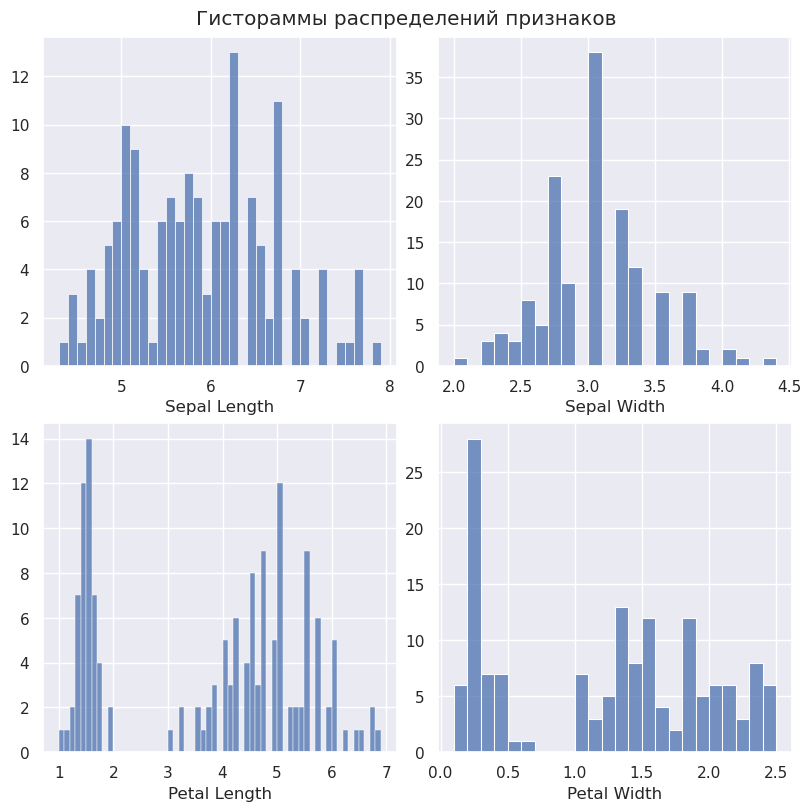

In [29]:
sns.set_theme()
fig, axs = plt.subplots(nrows=2, 
                        ncols=2, 
                        sharex=False, 
                        sharey=False, 
                        constrained_layout=True, 
                        figsize=(8, 8))

fig.suptitle("Гистораммы распределений признаков")

for i, feature in enumerate(X_columns):
    ax = axs[i // 2, i % 2]
    # ax.set_title(feature)
    
    sample = iris[feature]
    # sns.histplot(ax=ax, data=iris, x=feature, stat='density', binwidth=0.1)
    sns.histplot(ax=ax, data=iris, x=feature, stat='count', binwidth=0.1)

    # sample_mean, sample_std = estimate(sample)
    # distribution = stats.norm(loc=sample_mean, scale=sample_std)
    # x = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std, endpoint=True)    
    # sns.lineplot(ax=ax, x=x, y=distribution.pdf(x), color='orange')

    # ax.set(xlabel=None)
    ax.set(ylabel=None)
plt.show()

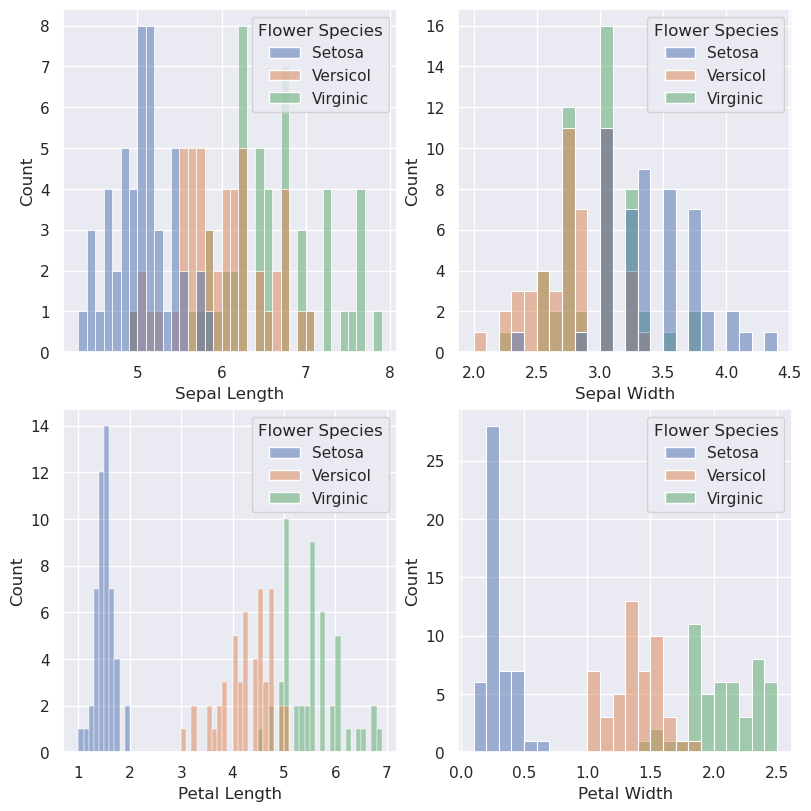

In [39]:
sns.set_theme()
fig, axs = plt.subplots(nrows=2, 
                        ncols=2, 
                        sharex=False, 
                        sharey=False, 
                        constrained_layout=True, 
                        figsize=(8, 8))

for i, feature in enumerate(X_columns):
    ax = axs[i // 2, i % 2]
    sns.histplot(ax=ax, 
                 data=iris, 
                 x=feature, 
                 binwidth=0.1, 
                 stat='count', 
                #  stat='density', 
                 hue=y_column)
    

    # x = np.linspace(*ax.get_xlim(), 1000)

    # for category in categories:
    #     sample = iris[iris[y_column] == category][feature]

    #     sample_mean, sample_std = estimate(sample)
        # N = stats.norm(loc=sample_mean, scale=sample_std)
        # ax.plot(x, N.pdf(x) / 3, label=category)
    
    # ax.legend()
plt.show()

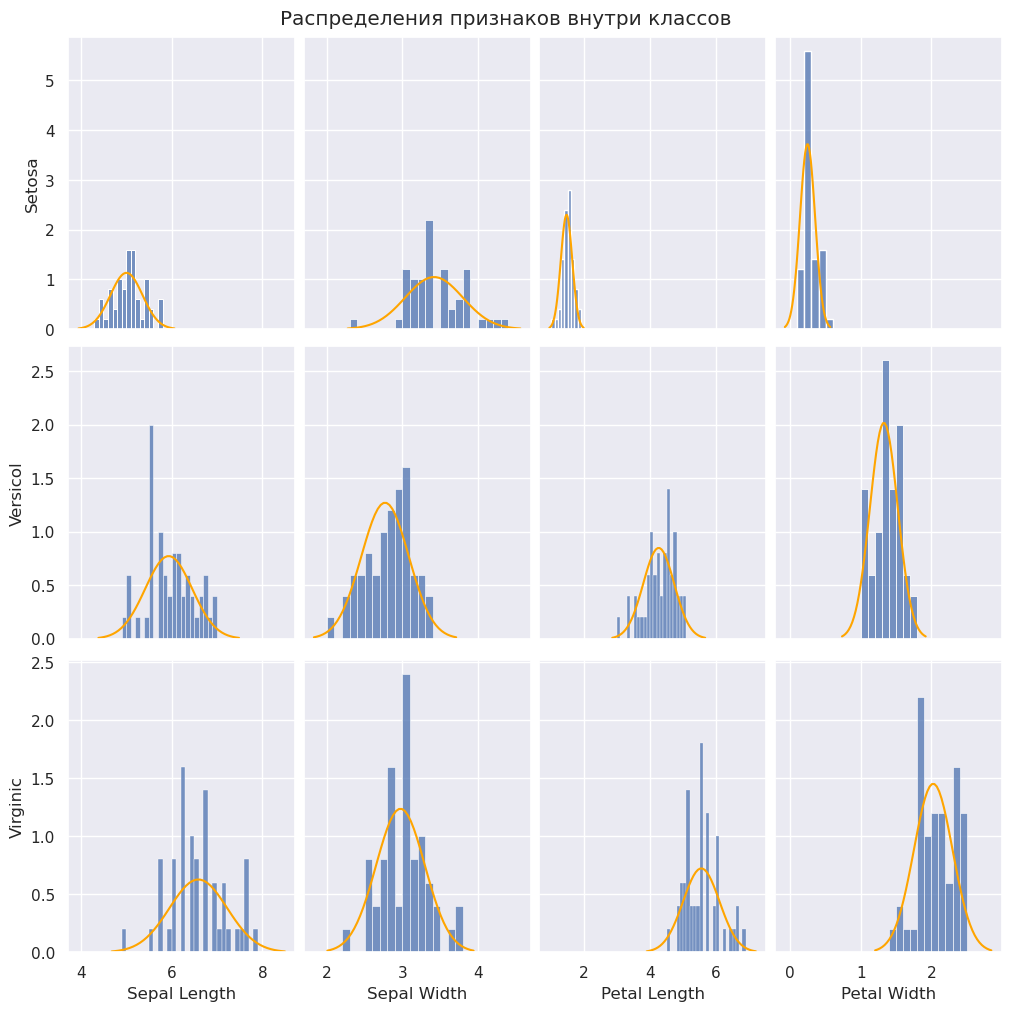

In [339]:
fig, axs = plt.subplots(nrows=3, 
                        ncols=4, 
                        sharex='col', 
                        sharey='row', 
                        constrained_layout=True, 
                        figsize=(10, 10))
fig.suptitle(f'Распределения признаков внутри классов')
for i, category in enumerate(categories):
    data = iris[iris[y_column] == category]

    for j, feature in enumerate(X_columns):
        ax = axs[i, j]
        # ax.set_title(feature)

        # histogram
        sns.histplot(ax=ax, data=data, x=feature, binwidth=0.1, stat='density')

        # probability density function
        sample = data[feature]
        sample_mean, sample_std = estimate(sample)
        distribution = stats.norm(loc=sample_mean, scale=sample_std)
        x = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std)
        sns.lineplot(ax=ax, x=x, y=distribution.pdf(x), color='orange')
        ax.set(xlabel=feature)
        ax.set(ylabel=category)
plt.show()

In [237]:
kolmogorov_smirnov = np.zeros(shape=(num_categories, num_features))
shapiro_wilk = np.zeros(shape=(num_categories, num_features))

In [242]:
for i, category in enumerate(categories):
    print(f'\nCategory: {category}')
    
    for j, feature in enumerate(X_columns):        
        sample = iris[iris[y_column] == category][feature]
                
        sample_mean, sample_std = estimate(sample)
        distribution = stats.norm(loc=sample_mean, scale=sample_std)

        alpha = 0.05 # Level of statistical significance
        res_ks = stats.kstest(rvs=sample, cdf=distribution.cdf) # Kolmagorov-Smirnov Test
        res_sw = stats.shapiro(x=sample)                        # Shapiro-Wilk Test
        
        kolmogorov_smirnov[i, j] = res_ks.pvalue
        shapiro_wilk[i, j] = res_sw.pvalue
        # print(f'{category}-{feature};\tKolmagorov-Smirnov: {res_ks.pvalue:0.6f};\tShapiro-Wilk: {res_sw.pvalue:0.6f}')
        print(f'Feature: {feature};\tp-value: {res_ks.pvalue:0.6f}')
        # print(f'Feature: {feature};\tp-value: {res_sw.pvalue:0.6f}')
        
        # if (res_ks.pvalue <= alpha or res_sw.pvalue <= alpha):
        #     print(f'{category}-{feature} is unlikely (p-value = {res_ks.pvalue:0.6f} <= {alpha}) to be distributed normally.')


Category: Setosa
Feature: SLENGTH;	p-value: 0.488924
Feature: SWIDTH;	p-value: 0.489563
Feature: PLENGTH;	p-value: 0.148617
Feature: PWIDTH;	p-value: 0.000012

Category: Versicol
Feature: SLENGTH;	p-value: 0.707123
Feature: SWIDTH;	p-value: 0.426888
Feature: PLENGTH;	p-value: 0.464242
Feature: PWIDTH;	p-value: 0.204112

Category: Virginic
Feature: SLENGTH;	p-value: 0.486998
Feature: SWIDTH;	p-value: 0.356470
Feature: PLENGTH;	p-value: 0.502872
Feature: PWIDTH;	p-value: 0.425794


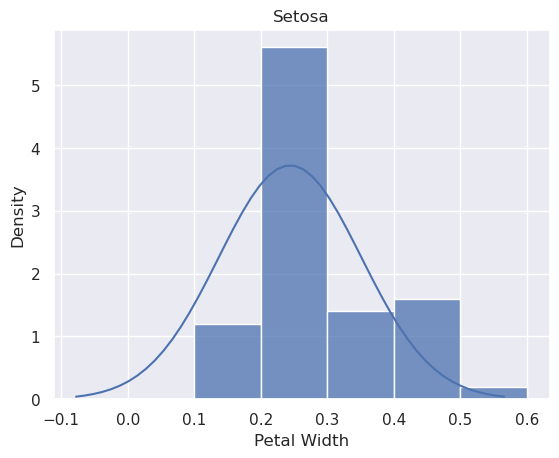

In [345]:
sns.set_theme()
sample = iris[iris[y_column] == 'Setosa']['Petal Width']

ax = sns.histplot(data=sample, 
                  stat='density', 
                  binwidth=0.1)
ax.set_title('Setosa')

# Best fit normal distribution
sample_mean, sample_std = estimate(sample)

distribution = stats.norm(loc=sample_mean, scale=sample_std)
x = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std)

ax.plot(x, distribution.pdf(x))

plt.show()

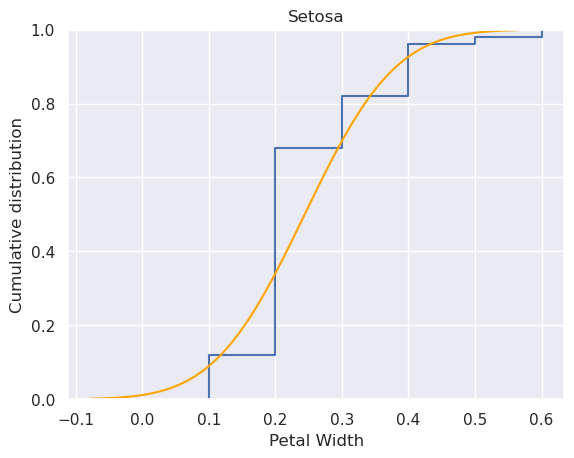

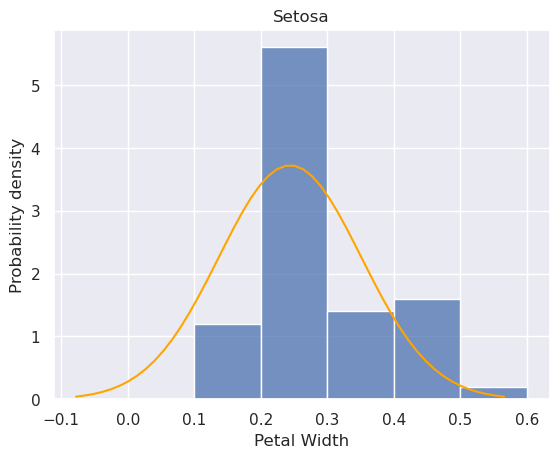

In [29]:
sns.set_theme()
sample = iris[iris[y_column] == 'Setosa']['Petal Width']

ax = plt.subplot()
ax.set_title('Setosa')

# Best fit normal distribution
sample_mean, sample_std = estimate(sample)
distribution = stats.norm(loc=sample_mean, scale=sample_std)
x = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std)

sns.ecdfplot(ax=ax, data=sample)
sns.lineplot(x=x, y=distribution.cdf(x), ax=ax, color='orange')
ax.set(ylabel='Cumulative distribution')
plt.show()

ax = plt.subplot()
ax.set_title('Setosa')

sns.histplot(ax=ax, data=sample, stat='density', binwidth=0.1)
sns.lineplot(ax=ax, x=x, y=distribution.pdf(x), color='orange')
ax.set(ylabel='Probability density')
plt.show()

In [70]:
def rounded_cdf(x):
    delta = 0.1
    sample = iris[iris[y_column] == 'Setosa']['Petal Width']
    sample_mean, sample_std = estimate(sample)
    distribution = stats.norm(loc=sample_mean, scale=sample_std)
    return distribution.cdf(delta * np.floor(x / delta) + delta / 2)

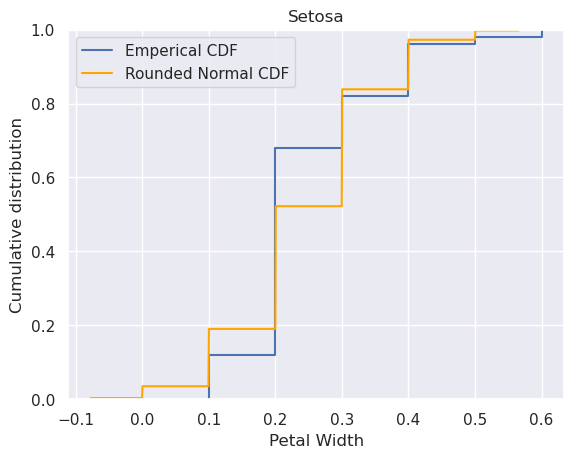

In [71]:
sns.set_theme()
sample = iris[iris[y_column] == 'Setosa']['Petal Width']

ax = plt.subplot()
ax.set_title('Setosa')

x = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std, 1000)

sns.ecdfplot(ax=ax, data=sample, label='Emperical CDF')
sns.lineplot(ax=ax, x=x, y=rounded_cdf(x), color='orange', label='Rounded Normal CDF')
ax.set(ylabel='Cumulative distribution')
plt.show()

In [72]:
sample = iris[iris[y_column] == 'Setosa']['Petal Width']
stats.kstest(sample, rounded_cdf)

KstestResult(statistic=0.4023152302029738, pvalue=8.06081357008489e-08, statistic_location=0.2, statistic_sign=-1)

In [83]:
X_train = iris[iris[set_column] == 'Train'][X_columns]
y_train = iris[iris[set_column] == 'Train'][y_column]
X_test = iris[iris[set_column] == 'Select'][X_columns]
y_test = iris[iris[set_column] == 'Select'][y_column]

model = naive_bayes.GaussianNB()
model.fit(X=X_train, y=y_train)
y_pred = model.predict(X=X_test)
y_pred

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicol',
       'Versicol', 'Versicol', 'Versicol', 'Versicol', 'Versicol',
       'Versicol', 'Virginic', 'Versicol', 'Versicol', 'Versicol',
       'Versicol', 'Versicol', 'Versicol', 'Versicol', 'Versicol',
       'Versicol', 'Versicol', 'Versicol', 'Versicol', 'Versicol',
       'Versicol', 'Versicol', 'Versicol', 'Virginic', 'Virginic',
       'Virginic', 'Virginic', 'Versicol', 'Virginic', 'Virginic',
       'Virginic', 'Virginic', 'Virginic', 'Virginic', 'Virginic',
       'Virginic', 'Virginic', 'Virginic', 'Virginic', 'Virginic',
       'Versicol', 'Virginic', 'Virginic', 'Virginic', 'Virginic',
       'Virginic'], dtype='<U8')

In [84]:
result = (y_test == y_pred)
total = np.size(result)
correct = result.sum()
print(f'Correct {correct} out of total {total}. Accuracy {(correct / total):0.3f}.')

Correct 67 out of total 70. Accuracy 0.957.


In [90]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[23  0  0]
 [ 0 23  1]
 [ 0  2 21]]


In [18]:
X_test[y_column] = y_test
X_test['Prediction'] = y_pred
X_test['Correct'] = X_test[y_column] == X_test['Prediction']
X_test

,Sepal Length,Sepal Width,Petal Length,Petal Width,Flower Species,Prediction,Correct
0,5.1,3.5,1.4,0.2,Setosa,Setosa,True
1,4.9,3.0,1.4,0.2,Setosa,Setosa,True
3,4.6,3.1,1.5,0.2,Setosa,Setosa,True
7,5.0,3.4,1.5,0.2,Setosa,Setosa,True
8,4.4,2.9,1.4,0.2,Setosa,Setosa,True
...,...,...,...,...,...,...,...
138,6.0,3.0,4.8,1.8,Virginic,Virginic,True
139,6.9,3.1,5.4,2.1,Virginic,Virginic,True
145,6.7,3.0,5.2,2.3,Virginic,Virginic,True
147,6.5,3.0,5.2,2.0,Virginic,Virginic,True


In [27]:
predict_probabilities = model.predict_proba(X_test[X_test['Correct'] == False][X_columns])
print(np.round(predict_probabilities * 100, 1))

[[ 0.  10.6 89.4]
 [ 0.  92.1  7.9]
 [ 0.  71.7 28.3]]


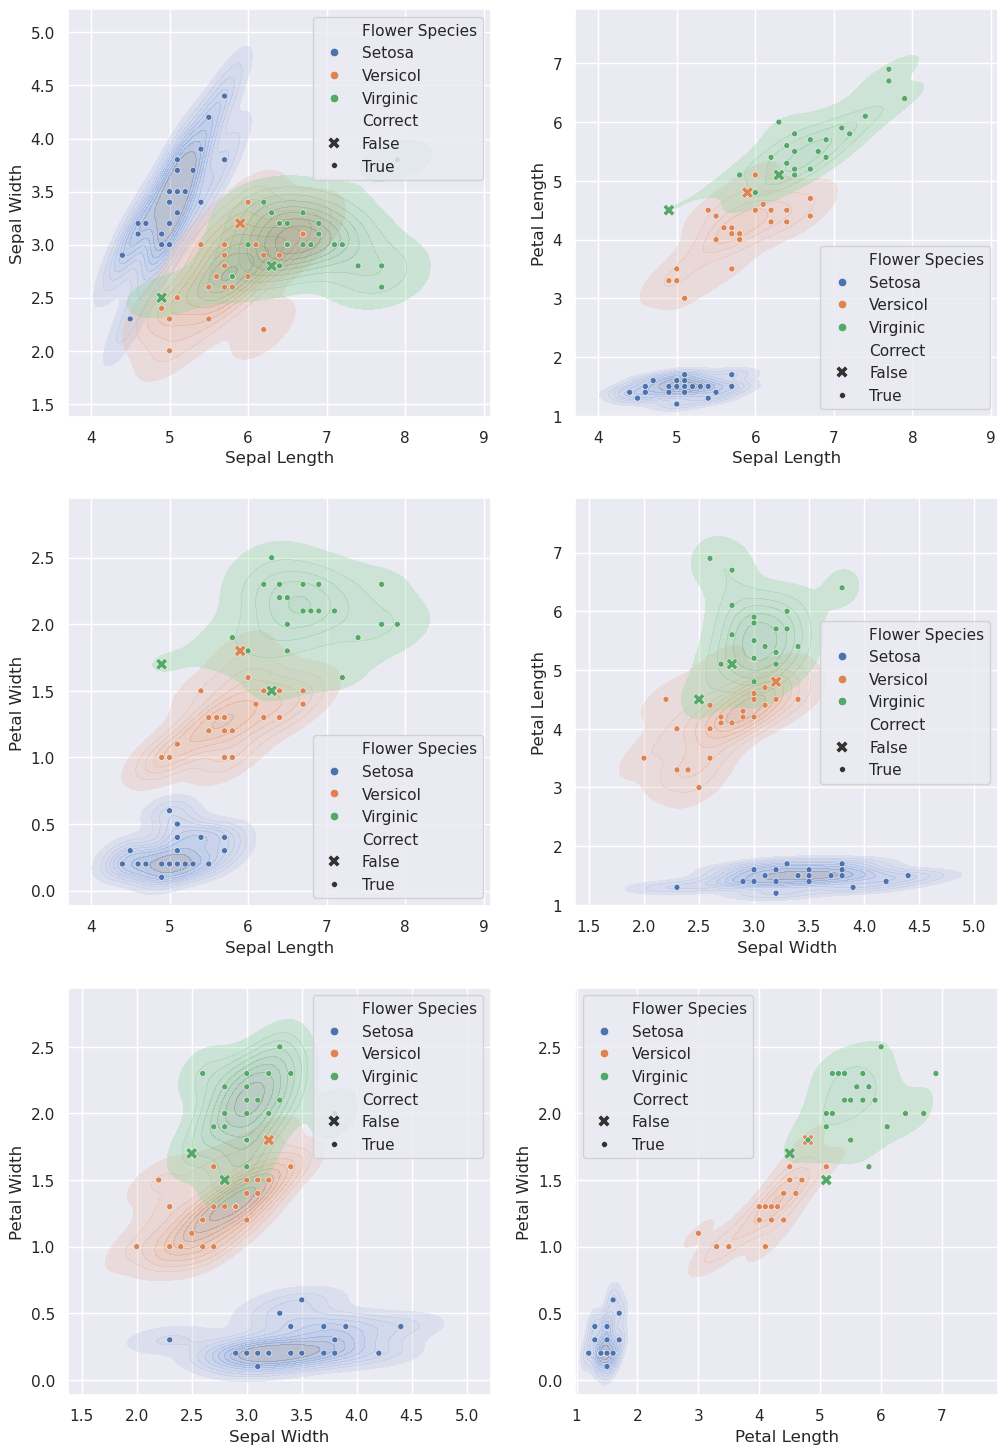

In [436]:
sns.set_theme()
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(12, 18), )

# fig.suptitle('Prediction results')
index = 0
for i in range(num_features):
    for j in range(i + 1, num_features):
        ax = axs[index // 2, index % 2]

        sns.kdeplot(ax=ax, 
                    data=X_test, 
                    x=X_columns[i], 
                    y=X_columns[j], 
                    hue=y_column, 
                    alpha=0.3, 
                    fill=True, 
                    bw_adjust=1.0)

        sns.scatterplot(ax=ax, 
                        data=X_test, 
                        x=X_columns[i], 
                        y=X_columns[j], 
                        hue=y_column, 
                        style='Correct', 
                        style_order=[True, False], 
                        size='Correct')

        index += 1
plt.show()        

In [73]:
def log_likelihood(sample : np.ndarray, 
                   loc : float=0.0, 
                   scale : float=1.0, 
                   decimals : int=0):
    delta = 10**(-decimals)
    dist = stats.norm(loc=loc, scale=scale)
    return np.log(np.prod(dist.cdf(sample + 0.5 * delta) - dist.cdf(sample - 0.5 * delta)))

In [74]:
def gradient_descent(sample : np.ndarray, 
                     m0 : float, 
                     s0 : float, 
                     epsilon : float=1e-9, 
                     delta = 1e-6, 
                     decimals=0):
    n = 1000
    
    m = m0
    s = s0
    values = np.zeros(n)
    
    dldm = (log_likelihood(sample, m + epsilon, s, decimals) - log_likelihood(sample, m, s, decimals)) / epsilon
    dlds = (log_likelihood(sample, m , s + epsilon, decimals) - log_likelihood(sample, m, s, decimals)) / epsilon
    
    for i in range(n):
        values[i] = log_likelihood(sample, m, s, decimals)
        
        m += dldm * delta
        s += dlds * delta

        dldm = (log_likelihood(sample, m + epsilon, s, decimals) - log_likelihood(sample, m, s, decimals)) / epsilon
        dlds = (log_likelihood(sample, m , s + epsilon, decimals) - log_likelihood(sample, m, s, decimals)) / epsilon

    return m, s, values


In [75]:
sample = iris[iris[y_column] == 'Setosa']['Petal Width']
m, s = estimate(sample)
m, s, log_likelihood(sample=sample, loc=m, scale=s, decimals=1)

(0.244, 0.1072095030816784, -74.03416287743406)

In [53]:
m_estimation, s_estimation = estimate(sample)
m_maxlikelihood, s_maxlikelihood, values = gradient_descent(sample, m_estimation, s_estimation, epsilon=1e-12, delta=1e-6, decimals=1)

print(m_estimation, s_estimation, log_likelihood(sample, m_estimation, s_estimation, decimals=1))
print(m_maxlikelihood, s_maxlikelihood, log_likelihood(sample, m_maxlikelihood, s_maxlikelihood, decimals=1))

0.244 0.1072095030816784 -74.03416287743406
0.2441324593768004 0.10228652194781926 -73.94029087392525


In [56]:
mu = np.linspace(0.241, 0.247)
sigma = np.linspace(0.095, 0.11)
MU, SIGMA = np.meshgrid(mu, sigma)
L = np.zeros_like(MU)
for i, m in enumerate(mu):
    for j, s in enumerate(sigma):
        L[j, i] = log_likelihood(sample, m, s, 1)

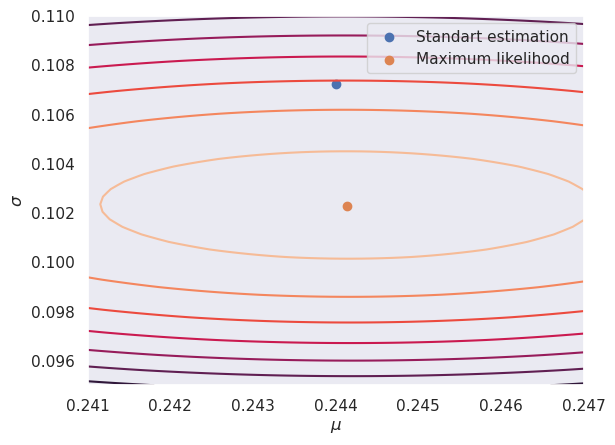

In [77]:
fig, ax = plt.subplots()
ax.scatter(m_estimation, s_estimation, label='Standart estimation')
ax.scatter(m_maxlikelihood, s_maxlikelihood, label='Maximum likelihood')
ax.legend()
ax.grid()
ax.set(xlabel='$\\mu$')
ax.set(ylabel='$\\sigma$')
CS = ax.contour(MU, SIGMA, L)

In [78]:
dist = stats.norm(loc=m_estimation, scale=s_estimation)
dist_corrected = stats.norm(loc=m_maxlikelihood, scale=s_maxlikelihood)

def cdf(x):
    delta = 0.1
    return dist_corrected.cdf(delta * np.floor(x / delta) + delta / 2)

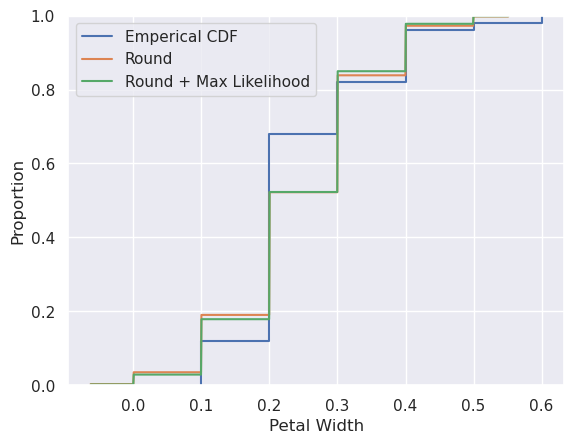

In [82]:
sample = iris[iris['Flower Species'] == 'Setosa']['Petal Width']

x = np.linspace(m_maxlikelihood - 3 * s_maxlikelihood, m_maxlikelihood + 3 * s_maxlikelihood, 1000)
ax = plt.subplot()
sns.ecdfplot(ax=ax, data=sample, label='Emperical CDF')
ax.plot(x, rounded_cdf(x), label='Round')
ax.plot(x, cdf(x), label='Round + Max Likelihood')
ax.legend()
plt.show()

In [68]:
stats.kstest(sample, cdf)

KstestResult(statistic=0.4028722890006403, pvalue=7.677156262772922e-08, statistic_location=0.2, statistic_sign=-1)